1.You play golf every Sunday and you invite your best friend, Arthur to come with you every time. Arthur sometimes comes to join but sometimes not. For him, it depends on a number of factors for example, , ,  and . We'll use the dataset of last two week to predict whether or not Arthur will join you to play golf. An intuitive way to do this is through a Decision Tree

Note:-I have perform decisontree on both the data but With only 15 rows of data, decision trees face challenges including limited coverage of the feature space, an increased risk of overfitting, inability to capture complexity, and difficulties in validation and generalization due to the insufficient sample size.
if we try to apply hyperparameter tuning model will become worst and we cannot try out cross-validation in this data because in crossvalidation data again split from training data into 80:20.
hence this assignment is overfitted.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
data1=pd.read_csv("playgolf_data.csv")

In [6]:
data1.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


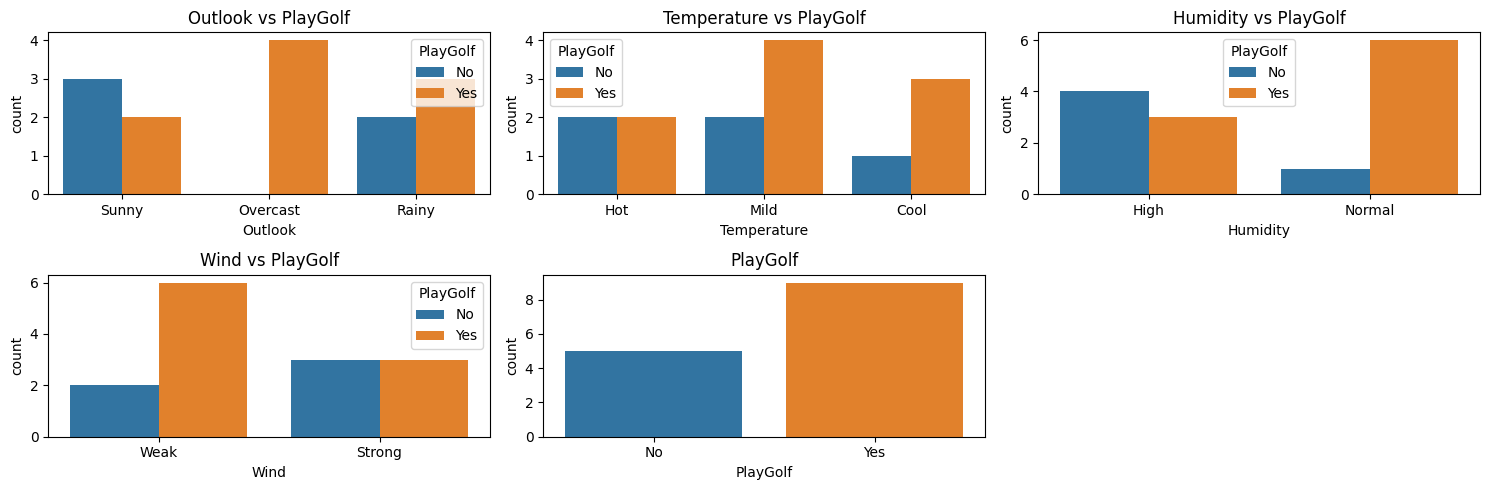

In [113]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
sns.countplot(data=data1, x='Outlook', hue='PlayGolf')
plt.title('Outlook vs PlayGolf')

plt.subplot(2, 3, 2)
sns.countplot(data=data1, x='Temperature', hue='PlayGolf')
plt.title('Temperature vs PlayGolf')

plt.subplot(2, 3, 3)
sns.countplot(data=data1, x='Humidity', hue='PlayGolf')
plt.title('Humidity vs PlayGolf')

plt.subplot(2, 3, 4)
sns.countplot(data=data1, x='Wind', hue='PlayGolf')
plt.title('Wind vs PlayGolf')

plt.subplot(2, 3, 5)
sns.countplot(data=data1, x='PlayGolf')
plt.title('PlayGolf')

plt.tight_layout()
plt.show()

In [8]:
encoder=LabelEncoder()
data1['Encoded_Outlook']=encoder.fit_transform(data1['Outlook'])
data1['Encoded_Temperature']=encoder.fit_transform(data1['Temperature'])
data1['Encoded_Humidity']=encoder.fit_transform(data1['Humidity'])
data1['Encoded_Wind']=encoder.fit_transform(data1['Wind'])
data1['Encoded_PlayGolf']=encoder.fit_transform(data1['PlayGolf'])

In [13]:
data1

,Outlook,Temperature,Humidity,Wind,PlayGolf,Encoded_Outlook,Encoded_Temperature,Encoded_Humidity,Encoded_Wind,Encoded_PlayGolf
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rainy,Mild,High,Weak,Yes,1,2,0,1,1
4,Rainy,Cool,Normal,Weak,Yes,1,0,1,1,1
5,Rainy,Cool,Normal,Strong,No,1,0,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Sunny,Mild,High,Weak,No,2,2,0,1,0
8,Sunny,Cool,Normal,Weak,Yes,2,0,1,1,1
9,Rainy,Mild,Normal,Weak,Yes,1,2,1,1,1


In [83]:
X=data1[['Encoded_Outlook','Encoded_Temperature','Encoded_Humidity','Encoded_Wind']]
y=data1['Encoded_PlayGolf']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
clf = DecisionTreeClassifier()

In [86]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [88]:
print(accuracy)

1.0


In [89]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=clf,
    X_train=X_train.values,  
    y_train=y_train.values,  
    X_test=X_test.values,    
    y_test=y_test.values,    
    random_seed=42,
    loss='mse'
)

print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.3516666666666666
Bias: 0.15084166666666668
Variance: 0.200825


In [90]:
data2=pd.read_csv("playgolf_data2.csv")

In [94]:
data2.head()


,Day,Outlook,Temperature,Humidity,Wind,PlayGolf
0,D1,Sunny,Mild,80,No,Yes
1,D2,Sunny,Hot,75,Yes,No
2,D3,Overcast,Hot,77,No,Yes
3,D4,Rainy,Cool,70,No,Yes
4,D5,Overcast,Cool,72,Yes,Yes


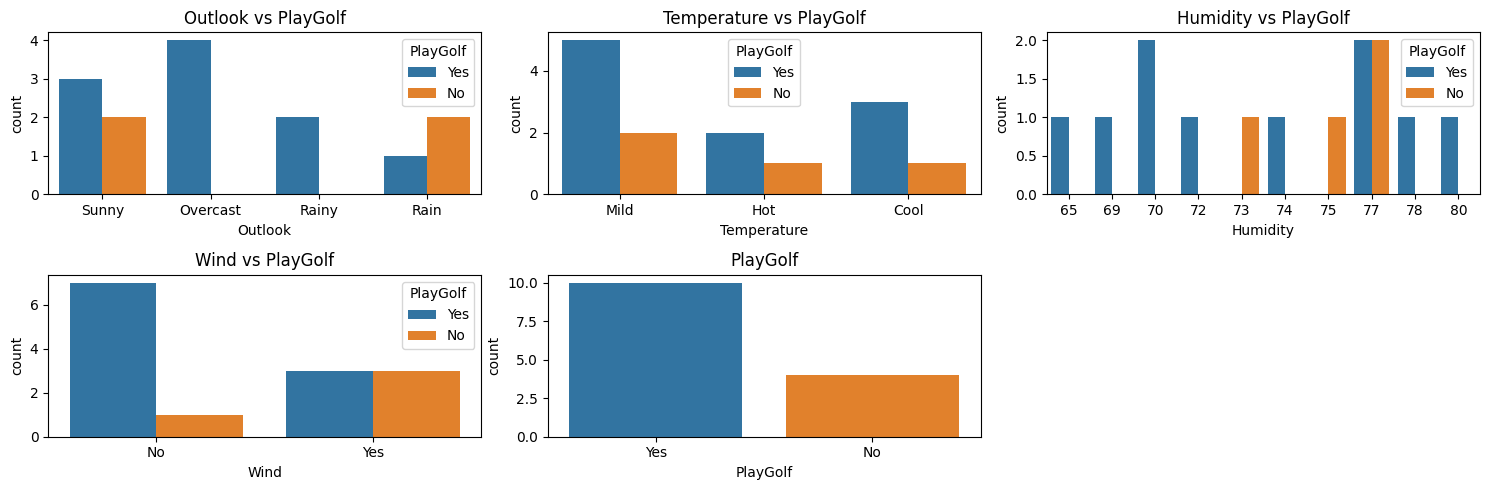

In [114]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
sns.countplot(data=data2, x='Outlook', hue='PlayGolf')
plt.title('Outlook vs PlayGolf')

plt.subplot(2, 3, 2)
sns.countplot(data=data2, x='Temperature', hue='PlayGolf')
plt.title('Temperature vs PlayGolf')

plt.subplot(2, 3, 3)
sns.countplot(data=data2, x='Humidity', hue='PlayGolf')
plt.title('Humidity vs PlayGolf')

plt.subplot(2, 3, 4)
sns.countplot(data=data2, x='Wind', hue='PlayGolf')
plt.title('Wind vs PlayGolf')

plt.subplot(2, 3, 5)
sns.countplot(data=data2, x='PlayGolf')
plt.title('PlayGolf')

plt.tight_layout()
plt.show()

In [96]:
encoder=LabelEncoder()
data2['Encoded_Outlook']=encoder.fit_transform(data2['Outlook'])
data2['Encoded_Temperature']=encoder.fit_transform(data2['Temperature'])
data2['Encoded_Humidity']=encoder.fit_transform(data2['Humidity'])
data2['Encoded_Wind']=encoder.fit_transform(data2['Wind'])
data2['Encoded_PlayGolf']=encoder.fit_transform(data2['PlayGolf'])

In [105]:
X2=data2[['Encoded_Outlook','Encoded_Temperature','Encoded_Humidity','Encoded_Wind']]
y2=data2['Encoded_PlayGolf']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [107]:
clf = DecisionTreeClassifier()

In [108]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [111]:
accuracy

1.0

In [112]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=clf,
    X_train=X_train.values,  
    y_train=y_train.values,  
    X_test=X_test.values,    
    y_test=y_test.values,    
    random_seed=42,
    loss='mse'
)

print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.47
Bias: 0.23136666666666664
Variance: 0.2386333333333333
